Author: Ethan Herron

3/4/2020

This is my jupyter notebook for the book Deep Learning from Scratch by Seth Weidman.
I will be following along with all of the code, and adding insights or questions I have along the way in these markdown cells.

Chapter 1 goes over the basic underlying math to neural networks.
This notebook goes over simple functions, their derivatives and the creation and derivation of nested functions, along with functions of multiple inputs and matrix multiplication.

In [2]:
print("Deep Learning from Scratch")

Deep Learning from Scratch


In [3]:
#import libraries
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from typing import Callable
from typing import Dict
from typing import List

## BASIC FUNCTIONS

In [4]:
def square(x: ndarray) -> ndarray:
    '''
    x^2
    '''
    return np.power(x, 2)

def leakyRelu(x: ndarray) -> ndarray:
    '''
    Relu with a slight twist
    '''
    return np.maximum(.2*x, x)

def sigmoid(x: ndarray) -> ndarray:
    '''
    Sigmoid function, most notable function for neural networks, but computationally more expensive compared to the
    Relu. Not quite sure why he is using the leakyRelu right now and how exactly it differs from the Relu, but I guess
    we'll see.
    '''
    return 1 / (1 + np.exp(-x))

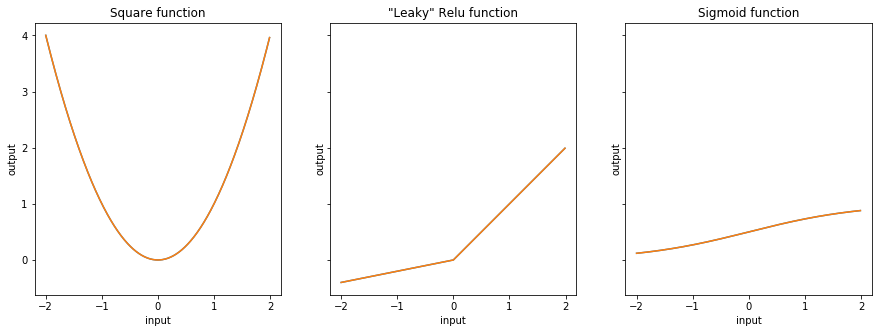

In [5]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(15,5))

inputRange = np.arange(-2, 2, 0.01)
ax[0].plot(inputRange, square(inputRange))
ax[0].plot(inputRange, square(inputRange))
ax[0].set_title('Square function')
ax[0].set_xlabel('input')
ax[0].set_ylabel('output')

ax[1].plot(inputRange, leakyRelu(inputRange))
ax[1].plot(inputRange, leakyRelu(inputRange))
ax[1].set_title('"Leaky" Relu function')
ax[1].set_xlabel('input')
ax[1].set_ylabel('output')

ax[2].plot(inputRange, sigmoid(inputRange))
ax[2].plot(inputRange, sigmoid(inputRange))
ax[2].set_title('Sigmoid function')
ax[2].set_xlabel('input')
ax[2].set_ylabel('output');

## DERIVATIVES OF FUNCTIONS AND NESTED FUNCTIONS

In [6]:
def deriv(func: Callable[[ndarray],ndarray], input_: ndarray, delta: float = 0.001) -> ndarray:
    '''
    Evaluates the derivative of a function "func" at every element in the "input_" array.
    '''
    return(func(input_ + delta) - func(input_ - delta)) / (2*delta)

In [7]:
#A function takes in an ndarray as an argument and produces an ndarray

Array_Function = Callable[[ndarray], ndarray]

#A chain is a list of functions

Chain = List[Array_Function]

In [8]:
def chain_length_2(chain: Chain, x: ndarray) -> ndarray:
    '''
    Evaluates two functions in a row, in a "chain"
    '''
    assert len(chain) == 2
    
    f1 = chain[0]
    f2 = chain[1]
    
    return f2(f1(x))

def chain_deriv_2(chain: Chain, input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to compute the derivative of two nested functions
    (f2(f1(x))' = f2'(f1(x)) * f1'(x)
    '''
    assert len(chain) == 2
    
    assert input_range.ndim == 1
    
    f1 = chain[0]
    f2 = chain[1]
    
    #df1/dx
    f1_of_x = f1(input_range)
    
    #df1/du
    df1dx = deriv(f1, input_range)
    
    #df2/du(f1(x))
    df2du = deriv(f2, f1(input_range))
    
    #Multiplying these quantities together at each point
    return df1dx * df2du

In [9]:
def plot_chain(ax, chain: Chain, input_range: ndarray, length: int=2) -> None:
    '''
    Plots the designated chain function - a function made up of multiple 
    consecutive ndarray -> ndarray mappings - Across the input_range
    '''
    
    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"
    
    if length == 2:
        output_range = chain_length_2(chain, input_range)
    elif length == 3:
        output_range = chain_length_3(chain, input_range)
    ax.plot(input_range, output_range)

In [10]:
def plot_chain_deriv(ax, chain: Chain, input_range: ndarray, length: int=2) -> ndarray:
    '''
    Just plots the derivative of a nested function, aka the chain rule
    '''
    if length == 2:
        output_range = chain_deriv_2(chain, input_range)
    elif length == 3:
        output_range = chain_deriv_3(chain, input_range)
    ax.plot(input_range, output_range)


Text(0.5, 1.0, 'Function and derivative for \n$f(x) = sigmoid(square(x))$')

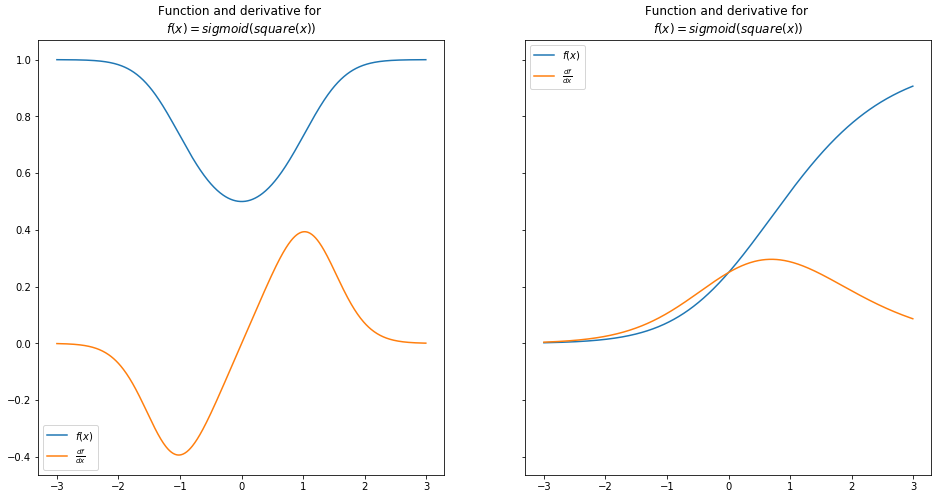

In [11]:
#plot results of the chain rule
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))

PLOT_RANGE = np.arange(-3, 3, 0.01)

chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

plot_chain(ax[0], chain_1, PLOT_RANGE)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Function and derivative for \n$f(x) = sigmoid(square(x))$")

plot_chain(ax[1], chain_2, PLOT_RANGE)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE)

ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Function and derivative for \n$f(x) = sigmoid(square(x))$")

In [12]:
def chain_length_3(chain: Chain, x: ndarray) -> ndarray:
    '''
    Evaluates three functions in a row, in a "Chain" 
    This object is just used to convey how a chain of functions 
    is evaulated.
    '''
    assert len(chain) == 3, \
    'the length of the input"chain" must be 3'
    
    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]
    
    return f3(f2(f1(x)))
    
def chain_deriv_3(chain: Chain, input_range: ndarray) -> ndarray:
    '''
    This will calculate the derivative of three nested functions using the chain rule.
    f3(f2(f1(x)))' = f3'(f2(f1(x))) * f2'(f1(x)) * f1(x)'
    '''
    assert len(chain) == 3, \
    "This function requires 'Chain' objects to have length of 3"
    
    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"
    
    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]
    
    #f1(x)
    f1_of_x = f1(input_range)
    
    #f2(f1(x))
    f2_of_x = f2(f1(input_range))
    
    #df3du
    df3du = deriv(f3, f2_of_x)
    
    #df2du
    df2du = deriv(f2, f1_of_x)
    
    #df1du
    df1du = deriv(f1, input_range)
    
    #Mutliply together at same point
    return df1du * df2du * df3du

Text(0.5, 1.0, 'Function and derivative for \n$f(x) = square(sigmoid(leakyRelu))$')

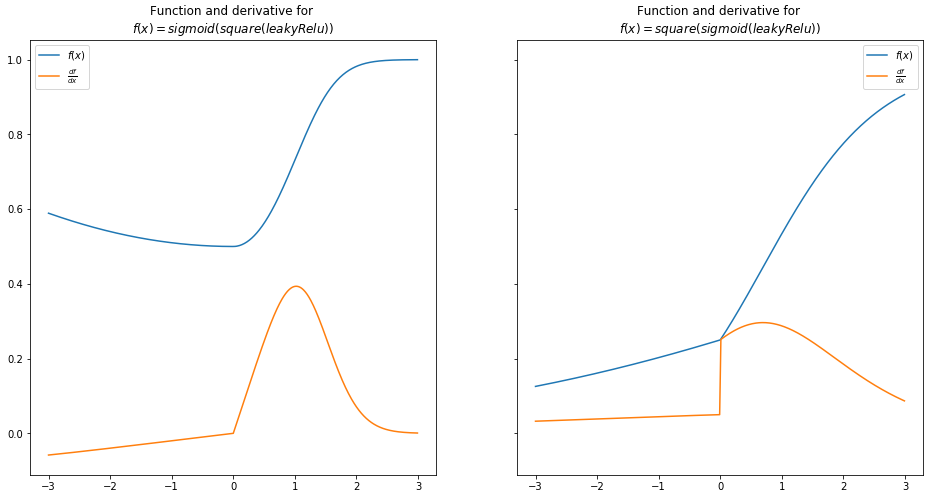

In [13]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16,8))

chain_1 = [leakyRelu, square, sigmoid]
chain_2 = [leakyRelu, sigmoid, square]

PLOT_RANGE = np.arange(-3, 3, 0.01)
plot_chain(ax[0], chain_1, PLOT_RANGE, length=3)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE, length=3)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Function and derivative for \n$f(x) = sigmoid(square(leakyRelu))$")

plot_chain(ax[1], chain_2, PLOT_RANGE, length=3)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE, length=3)

ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Function and derivative for \n$f(x) = square(sigmoid(leakyRelu))$")

## FUNCTIONS WITH MULTIPLE INPUTS

In [14]:
def multiple_inputs_add(x: ndarray, y: ndarray, sigma: Array_Function) -> float:
    '''
    Function with multiple inputs, which will be added together
    Forward pass
    '''
    assert x.shape == y.shape
    
    a = x + y
    return sigma(a)

def multiple_inputs_add_backwards(x: ndarray, y: ndarray, sigma: Array_Function) -> float:
    '''
    Computes the derivative of two functions with respect to both inputs
    '''
    # compute the forward pass
    a = x + y
    
    # compute the backward pass
    dsda = deriv(sigma, a)
    
    #derivatives a with respect to each variable
    dadx, dady = 1, 1
    
    return dsda * dadx, dsda * dady

def multiple_inputs_multiply_backwards(x: ndarray, y: ndarray, sigma: Array_Function) -> float:
    '''
    Computes the derivative of two functions with respect to both inputs
    '''
    # compute the foward pass
    a = x*y
    
    #compute the backward pass
    dsda = deriv(sigma, a)
    
    #derivatives of a with respect to each constituent variable
    dadx, dady = y, x
    
    return dsda * dadx, dsda * dady

## FUNCTIONS WITH MATRIX MULTIPLICATION

In [15]:
def matmul_forward(X: ndarray, W: ndarray) -> ndarray:
    '''
    Computes the forward pass of a matrix mulitplication
    '''
    assert X.shape[1] == W.shape[0], \
    '''
    for a dot product of X and W, X must be a 1xn and W must
    be a nx1 matrix which will give us a 1x1 matrix, or a scalar
    value. A dot product of two matrices
    '''.format(X.shape[1], W.shape[0])
    
    #matrix multiplication
    N = np.dot(X, W)
    
    return N

In [16]:
def matmul_backward_first(X: ndarray, W: ndarray) -> ndarray:
    '''
    Computes the backward pass of a mat mul w/ respect to the 
    first argument
    '''
    
    #backward pass
    dNdX = np.transpose(W, (1, 0))
    
    return dNdX

In [17]:
np.random.seed(190203)

X = np.random.randn(1,3)
W = np.random.randn(3,1)

print(X)
matmul_backward_first(X, W)

[[ 0.47231121  0.61514271 -1.72622715]]


array([[ 0.92819676, -0.60754888, -1.22136052]])

In [18]:
def matrix_forward_extra(X: ndarray, W: ndarray, sigma: Array_Function) -> ndarray:
    '''
    Computes the forward pass of a function involving mat mul
    with an additional function added to the end
    '''
    assert X.shape[1] == W.shape[0]
    
    #mat mul
    N = np.dot(X, W)
    
    #feed N through the additional function, sigma()
    S = sigma(N)
    
    return S

In [19]:
def matrix_function_backward_1(X: ndarray, W: ndarray, sigma: Array_Function) -> ndarray:
    '''
    Computes the derivative of our matrix function with
    respect to the first element
    '''
    assert X.shape[1] == W.shape[0]
    
    #matmul
    N = np.dot(X, W)
    
    #feeding the output of the matrix multiplication through sigma
    S = sigma(N)
    
    #backward calculation
    dSdN = deriv(sigma, N)
    
    # dNdX
    dNdX = np.transpose(W, (1, 0))
    
    #multiply them together; dNdX is 1x1 so the order of the 
    #operation will not matter
    return np.dot(dSdN, dNdX)

In [20]:
print(matrix_function_backward_1(X, W, sigmoid))

[[ 0.08516695 -0.05574581 -0.11206627]]


In [22]:
def forward_test(ind1, ind2, inc):
    
    X1 = X.copy()
    X1[ind1, ind2] = X[ind1, ind2] + inc
    
    return matrix_forward_extra(X1, W, sigmoid)

In [23]:
(np.round(forward_test(0, 2, 0.01) - forward_test(0, 2, 0), 4)) / 0.01

array([[-0.11]])

In [24]:
np.round(matrix_function_backward_1(X, W, sigmoid)[0, 2], 2)

-0.11

So as you can see these two are the same which means the gradients we have calculated are correct.

## MATRIX FUNCTIONS WITH A FINAL SUMMATION

In [28]:
def matrix_function_forward_sum(X: ndarray, W: ndarray, sigma: Array_Function) -> float:
    '''
    Computing the result of the forward pass of the function
    with input ndarray X and W and the final function sigma
    '''
    assert X.shape[1] == W.shape[0]
    
    #matmul
    N = np.dot(X, W)
    
    #feed N through sigma
    S = sigma(N)
    
    #sum all elements
    L = np.sum(S)
    
    return L

In [38]:
def matrix_function_backward_sum_1(X: ndarray, W: ndarray, sigma: Array_Function) -> ndarray:
    '''
    Compute derivative of matrix function with a sum wuth
    respect to the first matrix input
    '''
    assert X.shape[1] == W.shape[0]
    
    #matmul
    N = np.dot(X, W)
    
    #feeding the output matrix through sigma
    S = sigma(N)
    
    #sum elementwise
    L = np.sum(S)
    
    #derivatives will be referred to as their function names
    
    #dLdS - just 1's since L is a summation
    dLdS = np.ones_like(S)
    
    #dSdN
    dSdN = deriv(sigma, N)
    
    #dLdN 
    dLdN = dLdS * dSdN
    
    #dNdX 
    dNdX = np.transpose(W, (1, 0))
    
    dLdX = np.dot(dSdN, dNdX)
    
    return dLdX

## TESTING

In [39]:
np.random.seed(190204)
X = np.random.randn(3, 3)
W = np.random.randn(3, 2)

print("X: ")
print(X)

print("L: ")
print(round(matrix_function_forward_sum(X, W, sigmoid), 4))
print()
print("dLdX: ")
print(matrix_function_backward_sum_1(X, W, sigmoid))

X: 
[[-1.57752816 -0.6664228   0.63910406]
 [-0.56152218  0.73729959 -1.42307821]
 [-1.44348429 -0.39128029  0.1539322 ]]
L: 
2.3755

dLdX: 
[[ 0.2488887  -0.37478057  0.01121962]
 [ 0.12604152 -0.27807404 -0.13945837]
 [ 0.22992798 -0.36623443 -0.02252592]]


In [41]:
X1 = X.copy()
X1[0, 0] += 0.001

print(round((matrix_function_forward_sum(X1, W, sigmoid) - \
            matrix_function_forward_sum(X, W, sigmoid)) / 0.001, 4))

0.2489


Again, you can see the gradient are the same, the above is equal to dLdX(1, 1).

## PLOTTING

In [42]:
def matrix_function_forward_sum(X: ndarray, W: ndarray, sigma: Array_Function, modify_x11: bool = False, x11: float = 0.05) -> float:
    '''
    Computing the result of the forward pass of this function
    with input tensors X and W and function sigma
    '''
    assert X.shape[1] == W.shape[0]
    
    if modify_x11:
        X1 = X.copy()
        X1[0][0] = x11
        
    #matmul
    N = np.dot(X1, W)
    
    #feeding N through sigma
    S = sigma(N)
    
    #sum all elements
    L = np.sum(S)
    
    return L

In [43]:
print("X: ")
print(X)

X: 
[[-1.57752816 -0.6664228   0.63910406]
 [-0.56152218  0.73729959 -1.42307821]
 [-1.44348429 -0.39128029  0.1539322 ]]


In [44]:
x11s = np.arange(X[0][0] - 1, X[0][0] + 1, 0.01)
Ls = [matrix_function_forward_sum(X, W, sigmoid, 
                                  modify_x11 = True,
                                  x11=x11) for x11 in x11s]

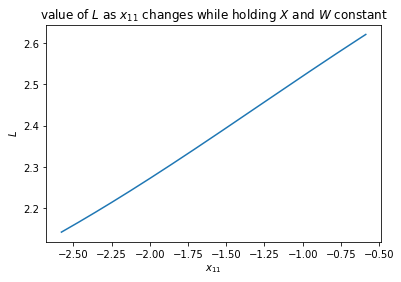

In [45]:
plt.plot(x11s, Ls);
plt.title("value of $L$ as $x_{11}$ changes while holding $X$ and $W$ constant")
plt.xlabel("$x_{11}$")
plt.ylabel("$L$");